<a href="https://colab.research.google.com/github/Darlywa/pytorch-tutorial/blob/main/basic_neural_network_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [33]:
class Model(nn.Module):
  #Basic neural network using pytorch to classify iris dataset

  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):

    super().__init__() #intantiate the nn.Module inherited
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):

    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [34]:
#pick a seed for randomization
torch.manual_seed(42)

#Turn on the model
model = Model()

In [4]:
#!pip list

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
irisDataframe = pd.read_csv(url)
irisDataframe.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
irisDataframe.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
#convert the labels to numbers
irisDataframe["species"] = irisDataframe["species"].replace("setosa", 0)
irisDataframe["species"] = irisDataframe["species"].replace("versicolor", 1)
irisDataframe["species"] = irisDataframe["species"].replace("virginica", 2)

In [10]:
irisDataframe

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
#Set X and y
X = irisDataframe.drop("species", axis = 1)
y = irisDataframe["species"]

In [12]:
#Convert X and y to numpy array
X = X.values
y = y.values

In [13]:
#Convert X and y to tensors
X = torch.FloatTensor(X)
y = torch.LongTensor(y)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
#Split X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [35]:
#Set a criterion to measure the model prediction error
criterion = nn.CrossEntropyLoss()

#Set an Adam optimizer and the lr = learning rate. (if the model loss or error is not reducing as the iteration proceed, then we can lower the lr)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [36]:
#Train the model
#Epoch? This is complete run all the train data through the network

epochs = 120
losses = []

for i in range(epochs):
  #Go forward and make a prediction

  yPred = model.forward(X_train) #Get predicted flowers type

  #Measure the network loss
  loss = criterion(yPred, y_train)

  #print the loss in every 10 epoch
  if i % 10 == 0:
    print(f"Epoch {i}; Loss: {loss}")

  #Append the loss to losses
  losses.append(loss.detach().numpy())

  #Optimise the network - feedback the errors or losses to enable its fine tune its weight
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch 0; Loss: 1.0846847295761108
Epoch 10; Loss: 0.9183797240257263
Epoch 20; Loss: 0.7622429132461548
Epoch 30; Loss: 0.6273833513259888
Epoch 40; Loss: 0.46674734354019165
Epoch 50; Loss: 0.28770607709884644
Epoch 60; Loss: 0.16738925874233246
Epoch 70; Loss: 0.10598892718553543
Epoch 80; Loss: 0.0802135318517685
Epoch 90; Loss: 0.06947017461061478
Epoch 100; Loss: 0.06436484307050705
Epoch 110; Loss: 0.06153516471385956


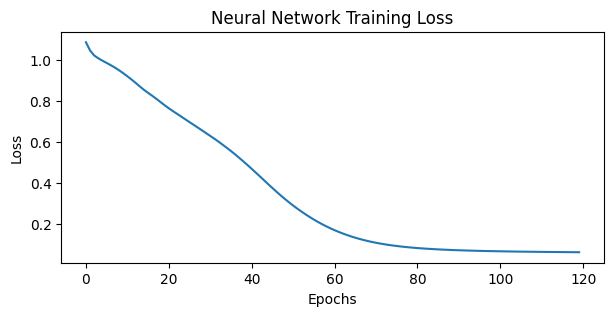

In [37]:
#Graph out the losses
fig = plt.subplots(figsize=(7,3))
plt.plot(range(epochs), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Neural Network Training Loss");
#plt.show();